# 4.6. Wpływ skalowania zmiennych na model

Regresja liniowa przypisuje każdej ze zmiennych wagę, która oznacza jak dużo dana cecha wnosi do predykcji modelu. Możemy to interpretować jako ważność danego atrybutu, jednak wykorzystane jednostki grają tutaj dużą rolę. Duża część modeli jakie tworzymy, powinna być również wytłumaczalna, szczególnie w obszarach przetwarzających dane wrażliwe.

In [1]:
import pandas as pd
import numpy as np

In [30]:
x = np.random.random(size=1000)
xy_df = pd.DataFrame({
    "x": x,
    "y": 2 * x + 0.5 * np.random.normal(size=1000)
})
xy_df.sample(n=5)

,x,y
420,0.137315,1.102679
336,0.623117,0.771559
94,0.477016,1.757402
334,0.818132,1.790919
111,0.773902,1.726350


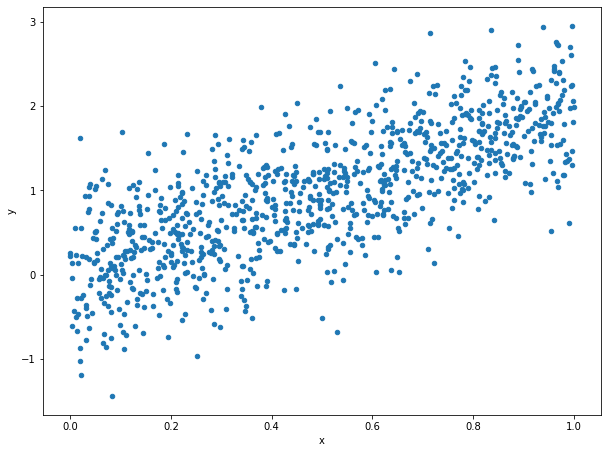

In [31]:
xy_df.plot.scatter(x="x", y="y",
                   figsize=(10.0, 7.5))

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
lr = LinearRegression()
lr.fit(xy_df[["x"]], xy_df["y"])
lr.coef_, lr.intercept_

(array([1.96792559]), -0.00287851644364312)

In [34]:
lr = LinearRegression()
lr.fit(1000 * xy_df[["x"]], xy_df["y"])
lr.coef_, lr.intercept_

(array([0.00196793]), -0.00287851644364312)

Wagi stworzonego modelu regresji mocno zależą od jednostek, jakie wykorzystaliśmy do zapisu wektorów. Jeśli zmienimy jednostkę, to wagi zostaną odpowiednio przeskalowane. Gdybyśmy chcieli wykorzystać te współczynniki jako pewnego rodzaju intuicję odnośnie tego jak poszczególne parametry wpływają na model, to porównywanie np. metrów z milimetrami albo kilogramami, ma niewiele sensu. W związku z tym, stosuje się często metody, które pozwalają na pozbycie się jednostek, zachowując jednak wzajemne relacje pomiędzy wektorami.

## Skalowanie cech

Istnieje kilka strategii skalowania wartości cech. Scikit-learn dostarcza gotowe implementacje, z których skorzystamy.

### Skalowanie min-max

Tego rodzaju skalowanie przekształca wartości cech do zadanego przedziału, najczęśćiej $ (0, 1) $. Skoro mamy dane wartości cech, to wyliczenie minimum i maksimum jest banalne, a poniższe przekształcenie przeprowadza skalowanie:

$$ \overline{x_{i}} = \frac{ x_{i} - \min{x} }{ \max{x} - \min{x} } $$

In [35]:
from sklearn.preprocessing import MinMaxScaler

In [36]:
mm_scaler = MinMaxScaler()
mm_scaler.fit(xy_df[["x"]])

MinMaxScaler(copy=True, feature_range=(0, 1))

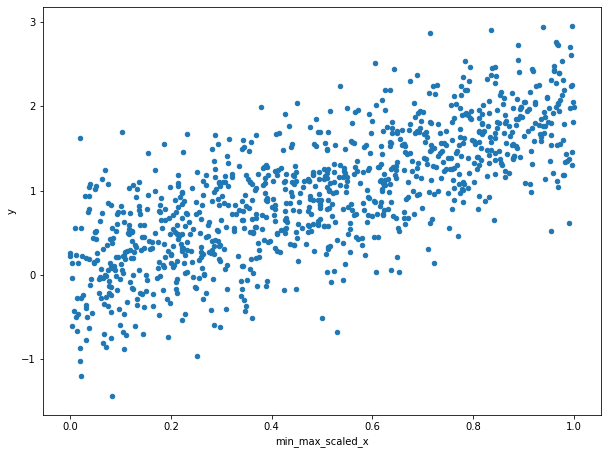

In [37]:
xy_df["min_max_scaled_x"] = mm_scaler.transform(xy_df[["x"]]).flatten()
xy_df.plot.scatter(x="min_max_scaled_x", y="y", 
                   figsize=(10.0, 7.5))

### Standaryzacja

Często wykorzystywana jest również standaryzacja zmiennych, czyli usunięcie ich średnich i zeskalowanie do jednostkowej wariancji. Skalowanie następuje w następujący sposób:

$$ \overline{x_{i}} = \frac{ x_{i} - mean(x) }{ std(x) } $$

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
std_scaler = StandardScaler()
std_scaler.fit(xy_df[["x"]])

StandardScaler(copy=True, with_mean=True, with_std=True)

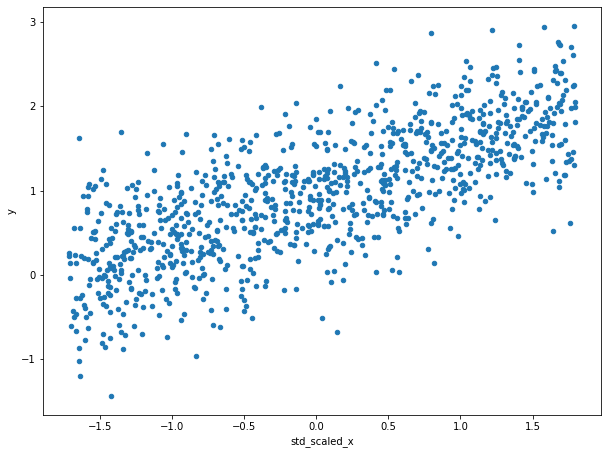

In [40]:
xy_df["std_scaled_x"] = std_scaler.transform(xy_df[["x"]]).flatten()
xy_df.plot.scatter(x="std_scaled_x", y="y", 
                   figsize=(10.0, 7.5))

Tego rodzaju metody przydadzą się nam jeszcze podczas omawiania klasyfikacji, ale skorzystamy z nich również w dalszej części omawiania regresji, ponieważ chcielibyśmy skorzystać z wag do interpretacji ważności poszczególnych cech.